In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,BatchNormalization,Dropout, LayerNormalization
from tensorflow.keras.models import save_model,Model, Sequential
from tensorflow.keras import callbacks
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split

Assignment Problems



1. Using the MNIST dataset, create a deep learning model to classify the images containing numbers. Use batch normalization and save the model using model checkpoints.

2. Using TensorFlow’s gradient tape, fit a regression line and update the weights using backpropagation by calculating the gradient.

# Solution

1. Using the MNIST dataset, create a deep learning model to classify the images containing numbers. Use batch normalization and save the model using model checkpoints.

Load MNIST dataset

In [3]:
(x_train_full, y_train_full),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train_full.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28)


In [4]:
x_train_full[:][1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         54, 227, 253, 252, 239, 233, 252,  57,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  60,
        224, 252, 253, 252, 202,  84, 252, 253, 122,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 252,
        252, 252, 253, 252, 252,  96, 189, 253, 167,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 238, 253,
        253, 190, 114, 253, 228,  47,  79, 255, 168,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252,
        179,  12,  75, 121,  21,   0,   0, 253, 243,  50,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 165, 253, 233, 208,
         84,   0,   0,   0,   0,   0,   0, 253, 252, 165,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7, 178, 252, 240,  71,  19,
         28,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  57, 252, 252,  63,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 198, 253, 190,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255, 253, 196,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  76, 246, 252, 112,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 148,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 230,  25,   0,   0,   0,
          0,   0,   0,   0,   0,   7, 135, 253, 186,  12,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 223,   0,   0,   0,   0,
          0,   0,   0,   0,   7, 131, 252, 225,  71,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 145,   0,   0,   0,   0,
          0,   0,   0,  48, 165, 252, 173,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  86, 253, 225,   0,   0,   0,   0,
          0,   0, 114, 238, 253, 162,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 249, 146,  48,  29,  85,
        178, 225, 253, 223, 167,  56,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 252, 252, 229, 215, 252,
        252, 252, 196, 130,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  28, 199, 252, 252, 253, 252, 252,
        233, 145,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  25, 128, 252, 253, 252, 141,
         37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [5]:
y_train_full[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
# creat train, test and valdiationm dataset
# Also scale down the data between 0 to 1 by dividing it by 255.
x_val = x_train_full[:5000] /255
x_train = x_train_full[5000:] /255
y_val = y_train_full[:5000]
y_train = y_train_full[5000:]
x_test = x_test/255

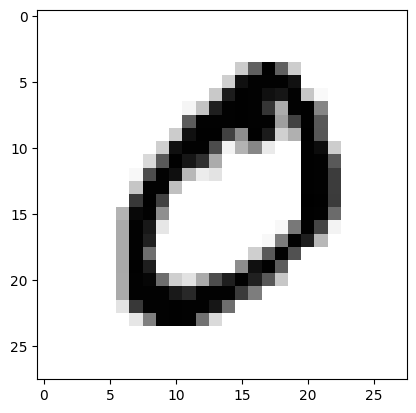

In [8]:
plt.imshow(x_val[1], cmap = "binary")

In [10]:
# creating NN layer

LAYERS = [tf.keras.layers.Flatten(input_shape =[28,28],name ="input_layer"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(300, activation = "relu",name = "hidden_layer_1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100, activation = "relu",name = "hidden_layer_2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10, activation = "softmax",name = "output_layer")
          ]

model_clf = tf.keras.models.Sequential(LAYERS)

In [11]:
model_clf.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Flatten)                │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_1 (Dense)               │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 300)                 │           1,200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_2 (Dense)               │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [12]:
model_clf.compile(loss = "sparse_categorical_crossentropy",
                  optimizer = "sgd",
                  metrics = ["accuracy"])

In [13]:
# add checkpoint
import os
if not os.path.isdir('content/tmp'):
  os.mkdir('/content/tmp')

In [14]:
model_checkpoint_dir = '/content/tmp/checkpoint.weights.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = model_checkpoint_dir,
                                                               save_weights_only = True,
                                                               monitor = "val_accuracy",
                                                               mode = "max",
                                                               save_best_only = True)

In [15]:
history = model_clf.fit(x_train, y_train, epochs = 20,
              validation_data = (x_val, y_val), batch_size = 32,
              callbacks = [model_checkpoint_callback])

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8164 - loss: 0.5988 - val_accuracy: 0.9476 - val_loss: 0.1790
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9426 - loss: 0.1919 - val_accuracy: 0.9590 - val_loss: 0.1349
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.9573 - loss: 0.1451 - val_accuracy: 0.9624 - val_loss: 0.1220
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9655 - loss: 0.1141 - val_accuracy: 0.9638 - val_loss: 0.1117
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9705 - loss: 0.0977 - val_accuracy: 0.9692 - val_loss: 0.1022
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9765 - loss: 0.0811 - val_accuracy: 0.9686 - val_loss: 0.0987
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9796 - loss: 0.0693 - val_accuracy: 0.9720 - val_loss: 0.0951
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9802 - loss: 0

In [16]:
pd.DataFrame(history.history).head()

,accuracy,loss,val_accuracy,val_loss
0,0.891127,0.362959,0.9476,0.178978
1,0.946091,0.181823,0.9590,0.134941
2,0.958945,0.138151,0.9624,0.122047
3,0.966236,0.112552,0.9638,0.111708
4,0.971309,0.095774,0.9692,0.102169


<Axes: >

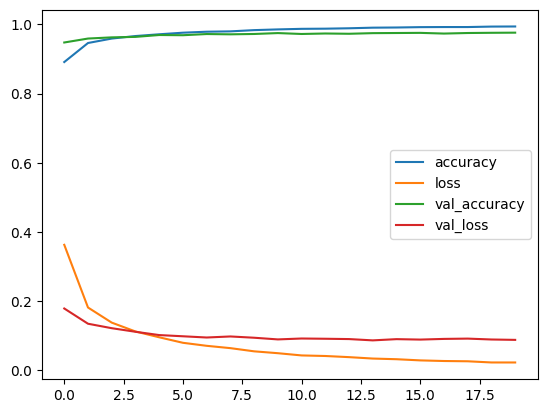

In [17]:
pd.DataFrame(history.history).plot()

In [18]:
model_clf.load_weights(model_checkpoint_dir)

In [19]:
y_prob = model_clf.predict(x_test[:3])
y_pred = np.argmax(y_prob, axis = 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


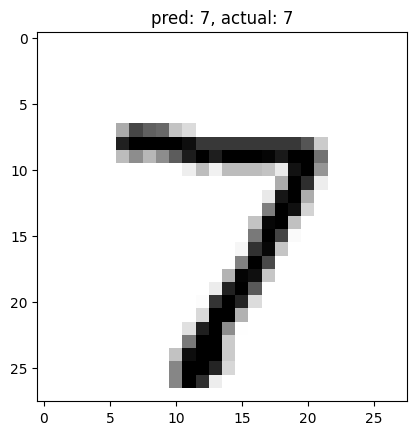

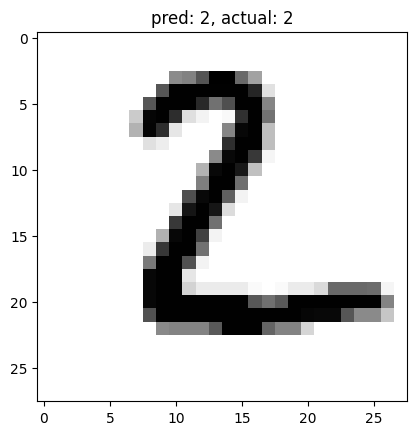

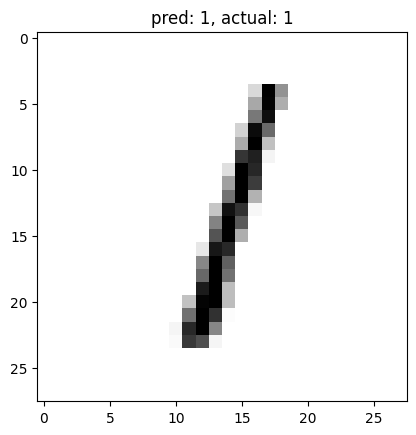

In [20]:
#plot:

for data, pred, actual in zip(x_test[:3], y_pred, y_test[:3]):
  plt.imshow(data, cmap = "binary")
  plt.title(f"pred: {pred}, actual: {actual}")
  plt.show()


2. Using TensorFlow’s gradient tape, fit a regression line and update the weights using backpropagation by calculating the gradient.

In [47]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
data = pd.read_csv('/content/dataset.csv', dtype=np.float32)

Mounted at /content/gdrive


In [48]:
data.dtypes

,0
Unnamed: 0,float32
x,float32
y,float32


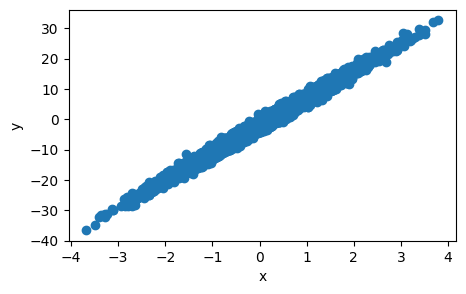

In [50]:
x = data['x']
y = data['y']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)
plt.figure(figsize = (5,3))
plt.scatter(x_train, y_train)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [59]:
# helper fucntions

def pred(x, W, B):
  # calculate y = Mx + C
  y_hat = W*x + B
  return  y_hat

def loss(x, y, W, B):
  # mean squared error
  y_hat = pred(x, W, B)
  squared_error = tf.square(y_hat - y)
  mse = tf.reduce_mean(squared_error)
  return mse

def calculate_gradeint(x, y, W, B):
  # calculate derivative of loss
  with tf.GradientTape() as tape:
    loss_value = loss(x, y, W, B)
  w_grad, b_grad = tape.gradient(loss_value, [W,B])
  return w_grad, b_grad



In [58]:
W = tf.Variable(np.random.rand(), dtype=np.float32)
B = tf.Variable(np.random.rand(), dtype=np.float32)
print(W)
print(B)
pred(x[0], W, B)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.026113441213965416>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.25531065464019775>


<tf.Tensor: shape=(), dtype=float32, numpy=0.27232542634010315>

Training

In [60]:
learning_rate = 0.01
num_epochs = 150
W = tf.Variable(np.random.rand())
B = tf.Variable(np.random.rand())
for epoch in range(num_epochs):
  w_grad, b_grad = calculate_gradeint(x_train, y_train, W, B)
  W.assign_sub(learning_rate*w_grad)
  B.assign_sub(learning_rate*b_grad)
  if epoch % 10 == 0:
    print(f"epoch: {epoch}, loss: {loss(x_train, y_train, W, B)}")

epoch: 0, loss: 77.91796112060547
epoch: 10, loss: 51.95899963378906
epoch: 20, loss: 34.761775970458984
epoch: 30, loss: 23.36894989013672
epoch: 40, loss: 15.821355819702148
epoch: 50, loss: 10.821149826049805
epoch: 60, loss: 7.50853967666626
epoch: 70, loss: 5.3139424324035645
epoch: 80, loss: 3.8600120544433594
epoch: 90, loss: 2.896768808364868
epoch: 100, loss: 2.2586116790771484
epoch: 110, loss: 1.8358218669891357
epoch: 120, loss: 1.5557138919830322
epoch: 130, loss: 1.370133399963379
epoch: 140, loss: 1.2471810579299927


In [62]:
print(f" learned wieght {W},learned bais {B} ")

 learned wieght <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=8.624064445495605>,learned bais <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-1.8681855201721191> 


In [64]:
test_loss = loss(x_test, y_test, W, B)
print(f"test loss: {test_loss}")

test loss: 1.1428122520446777


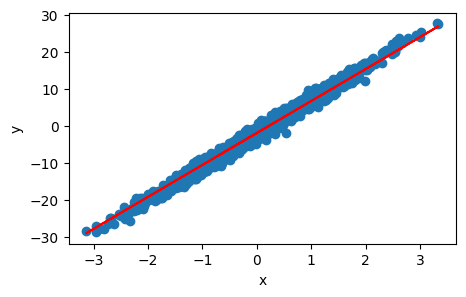

In [65]:
y_test_pred = W.numpy()*x_test + B.numpy()
plt.figure(figsize = (5,3))
plt.plot(x_test, y_test_pred, c='red')
plt.scatter(x_test, y_test)
plt.xlabel("x")
plt.ylabel("y")
plt.show()